# Foodie - X Analysis

### Problem Statement:
#### Dataset  - restaurant information contains the following information: Restaurant ID, Latitude, Longitude, Cuisines, Average Cost, Minimum Order, Rating, Votes, Reviews, and Cook Time.
##### To find: 4 conclusions from the dataset and demonstrat findings using data visualization tool

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

###### Reading the dataset file which is in the csv format 

In [2]:
foodiex_data = pd.read_csv("2020-XTern-DS.csv")
foodiex_data.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.26261,-85.83737,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.77593,-85.74058,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.25344,-85.12378,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.02984,-85.33205,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.88228,-85.51741,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


##### To determine the list of all columns with their data types and the number of non-null values in each column

In [3]:
foodiex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     2019 non-null   object 
 1   Latitude       2019 non-null   float64
 2   Longitude      2019 non-null   float64
 3   Cuisines       2019 non-null   object 
 4   Average_Cost   2019 non-null   object 
 5   Minimum_Order  2019 non-null   object 
 6   Rating         2019 non-null   object 
 7   Votes          2019 non-null   object 
 8   Reviews        2019 non-null   object 
 9   Cook_Time      2019 non-null   object 
dtypes: float64(2), object(8)
memory usage: 157.9+ KB


In [4]:
##Data pre-procesing
##Converting the datatypes to numerical and removing the null values so that they can be easily analyzed
foodiex_data['Average_Cost'] = foodiex_data['Average_Cost'].str.replace('$', '')
foodiex_data['Average_Cost'] = pd.to_numeric(foodiex_data['Average_Cost'], errors='coerce')
foodiex_data["Average_Cost"].fillna(foodiex_data["Average_Cost"].mean(), inplace=True)
foodiex_data['Minimum_Order'] = foodiex_data['Minimum_Order'].str.replace('$', '')
foodiex_data['Minimum_Order'] = pd.to_numeric(foodiex_data['Minimum_Order'], errors='coerce')
foodiex_data["Minimum_Order"].fillna(foodiex_data["Minimum_Order"].mean(), inplace=True)
foodiex_data['Rating'] = pd.to_numeric(foodiex_data['Rating'], errors='coerce')
foodiex_data["Rating"].fillna(foodiex_data["Rating"].mean(), inplace=True)
foodiex_data['Votes'] = pd.to_numeric(foodiex_data['Votes'], errors='coerce')
foodiex_data["Votes"].fillna(foodiex_data["Votes"].mean(), inplace=True)
foodiex_data['Reviews'] = pd.to_numeric(foodiex_data['Reviews'], errors='coerce')
foodiex_data["Reviews"].fillna(foodiex_data["Reviews"].mean(), inplace=True)
foodiex_data['Cook_Time_Num'] = foodiex_data['Cook_Time'].str.replace('([a-z]+)', '')
foodiex_data['Cook_Time_Unit'] = foodiex_data['Cook_Time'].str.extract('([a-z]+)')
foodiex_data['Cook_Time'] = pd.to_numeric(foodiex_data['Cook_Time_Num'], errors='coerce')
foodiex_data["Cook_Time"].fillna(foodiex_data["Cook_Time"].mean(), inplace=True)
foodiex_data=foodiex_data.drop(['Cook_Time_Num','Cook_Time_Unit'], axis = 1)
foodiex_data

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.26261,-85.83737,"Fast Food, Rolls, Burger, Salad, Wraps",20.00000,50.00000,3.50000,12.00000,4.00000,30
1,ID_2882,39.77593,-85.74058,"Ice Cream, Desserts",10.00000,50.00000,3.50000,11.00000,4.00000,30
2,ID_1595,39.25344,-85.12378,"Italian, Street Food, Fast Food",15.00000,50.00000,3.60000,99.00000,30.00000,65
3,ID_5929,39.02984,-85.33205,"Mughlai, North Indian, Chinese",25.00000,99.00000,3.70000,176.00000,95.00000,30
4,ID_6123,39.88228,-85.51741,"Cafe, Beverages",20.00000,99.00000,3.20000,521.00000,235.00000,65
...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.62498,-85.18921,"North Indian, Pizza, Burger, Continental",40.00000,0.00000,3.60930,254.79927,127.37344,30
2015,ID_319,39.13372,-85.50302,"Awadhi, Bihari",40.00000,99.00000,4.10000,118.00000,91.00000,30
2016,ID_3104,39.66299,-85.95089,"Fast Food, Beverages",10.00000,50.00000,3.60930,254.79927,127.37344,30
2017,ID_4396,39.30177,-85.66277,"Kebab, Fast Food",10.00000,50.00000,3.60930,254.79927,127.37344,30


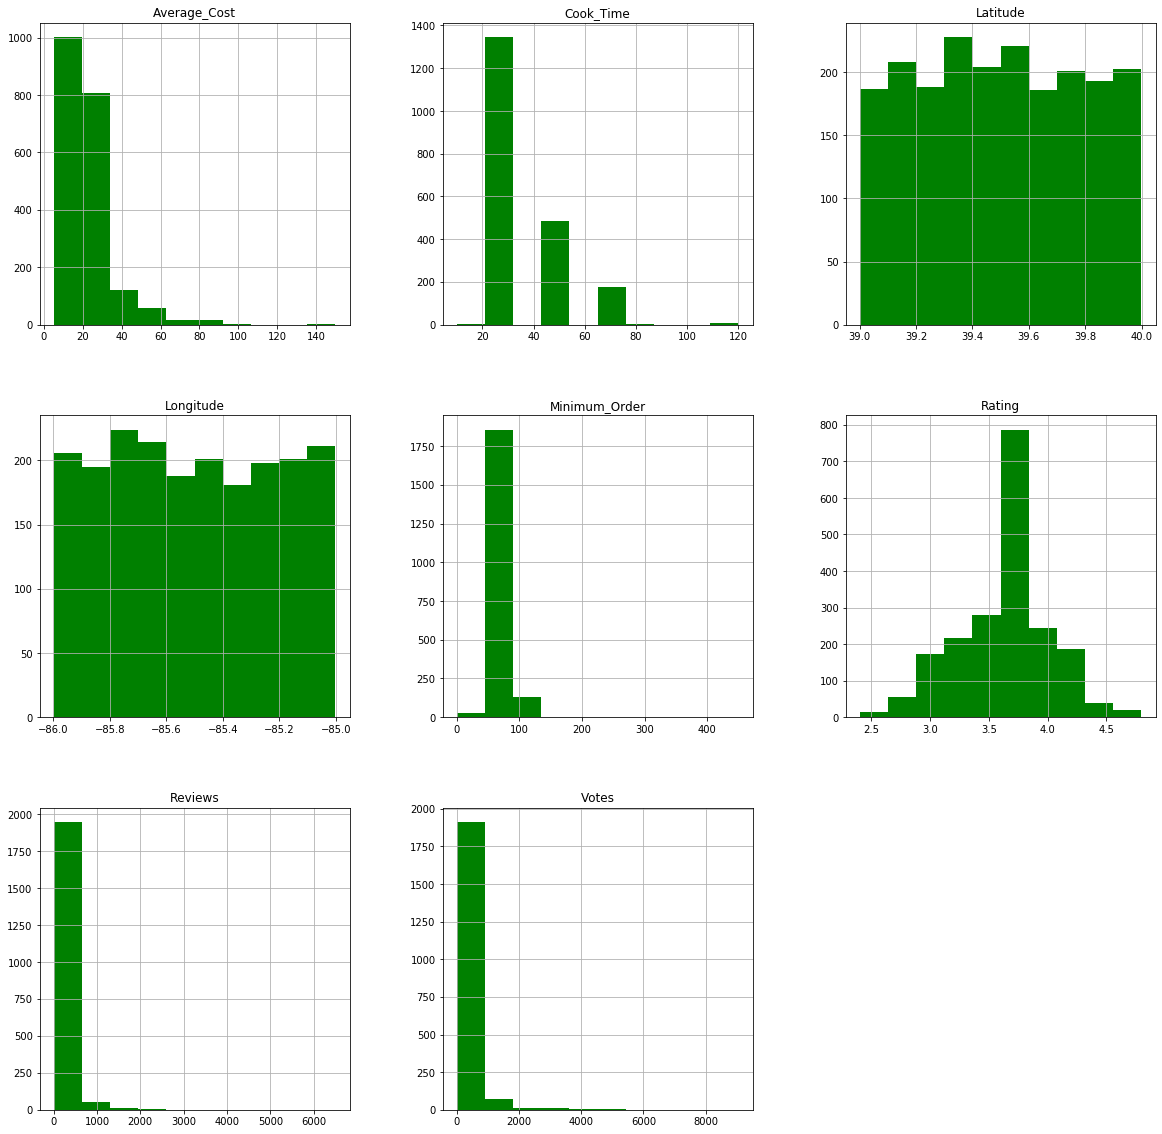

In [5]:
##Visualizing the data to perform necessary computations
foodiex_data.hist(color='Green',figsize= (20,20));

In [6]:
''''
To find which s the most popular cuisine and which cuisines are often offered together using apriori algorithm.
''''
##Frequent Cuisine Itemset
Foodie_df=foodiex_data.drop(['Latitude','Longitude','Rating','Average_Cost','Minimum_Order','Votes','Reviews','Cook_Time'], axis = 1)
Foodie_df.Cuisines=Foodie_df.Cuisines.str[0:-1].str.split(',').tolist()
Cuisine_List = Foodie_df.Cuisines
print(Cuisine_List)
ListOfList = Cuisine_List.tolist()

0        [Fast Food,  Rolls,  Burger,  Salad,  Wrap]
1                              [Ice Cream,  Dessert]
2                 [Italian,  Street Food,  Fast Foo]
3                  [Mughlai,  North Indian,  Chines]
4                                  [Cafe,  Beverage]
                            ...                     
2014    [North Indian,  Pizza,  Burger,  Continenta]
2015                                [Awadhi,  Bihar]
2016                          [Fast Food,  Beverage]
2017                              [Kebab,  Fast Foo]
2018                           [Desserts,  Beverage]
Name: Cuisines, Length: 2019, dtype: object


In [7]:
!pip install mlxtend

In [8]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [9]:
##Converting into right format using Transaction-Encoder
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(ListOfList).transform(ListOfList)
te_df = pd.DataFrame(te_ary, columns=te.columns_)
te_df

,Afgha,Afghan,America,American,Andhr,Andhra,Arabia,Arabian,Asia,Asian,...,South Indian,Street Foo,Street Food,Tamil,Tea,Tha,Thai,Tibeta,Tibetan,Wraps
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
te = TransactionEncoder()
te_ary = te.fit(ListOfList).transform(ListOfList)
Freqdf = pd.DataFrame(te_ary, columns=te.columns_)
frequentCuisine_itemsets = fpgrowth(Freqdf, min_support=0.05, use_colnames=True)
frequentCuisine_itemsets

,support,itemsets
0,0.07033,(Fast Food)
1,0.10896,( Fast Foo)
2,0.13026,( Chines)
3,0.08172,( North Indian)
4,0.08370,( Beverage)
5,0.05894,(Chinese)
6,0.10352,( Chinese)
7,0.22536,(North Indian)
8,0.05745,( Fast Food)
9,0.05250,( North India)


In [11]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequentCuisine_itemsets, metric="confidence", min_threshold=0.05)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Chines),(North Indian),0.13026,0.22536,0.08271,0.63498,2.81764,0.05336,2.12219
1,(North Indian),( Chines),0.22536,0.13026,0.08271,0.36703,2.81764,0.05336,1.37406
2,( Chinese),(North Indian),0.10352,0.22536,0.06389,0.61722,2.73885,0.04056,2.02375
3,(North Indian),( Chinese),0.22536,0.10352,0.06389,0.28352,2.73885,0.04056,1.25123


In [12]:
###This shows that in most cases, whenever a restaurant offers a NorthIndian cuisine, restaurant offers Chinese cuisine as well in most case

##### Setting the Restaurant ID as index 

In [13]:
md = foodiex_data[['Restaurant','Latitude','Longitude', 'Cuisines','Average_Cost', 'Minimum_Order','Rating','Votes','Reviews','Cook_Time']]
md.set_index('Restaurant', inplace=True)
md.head()

,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
Restaurant,,,,,,,,,
ID_6321,39.26261,-85.83737,"Fast Food, Rolls, Burger, Salad, Wraps",20.00000,50.00000,3.50000,12.00000,4.00000,30
ID_2882,39.77593,-85.74058,"Ice Cream, Desserts",10.00000,50.00000,3.50000,11.00000,4.00000,30
ID_1595,39.25344,-85.12378,"Italian, Street Food, Fast Food",15.00000,50.00000,3.60000,99.00000,30.00000,65
ID_5929,39.02984,-85.33205,"Mughlai, North Indian, Chinese",25.00000,99.00000,3.70000,176.00000,95.00000,30
ID_6123,39.88228,-85.51741,"Cafe, Beverages",20.00000,99.00000,3.20000,521.00000,235.00000,65


##### We see that, the Cuisine is a multivariate categorical data i.e a single restaurant offers more than one cuisine.
##### Splitting this value seperately so that one row contains only one cuisine value

In [14]:
'''
To find the nearest locatiosn where american cuisine is available

'''
s = md['Cuisines'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Cuisines'
del md['Cuisines']
md_split_genres = md.join(s)
md_split_genres.head()

,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Cuisines
Restaurant,,,,,,,,,
ID_1000,39.82935,-85.24935,25.00000,50.00000,3.70000,96.00000,55.00000,30,Bohri
ID_1000,39.82935,-85.24935,25.00000,50.00000,3.70000,96.00000,55.00000,30,Biryani
ID_1004,39.41700,-85.14852,10.00000,50.00000,3.00000,4.00000,1.00000,30,Fast Food
ID_1004,39.41700,-85.14852,10.00000,50.00000,3.00000,4.00000,1.00000,30,Sandwich
ID_1004,39.41700,-85.14852,10.00000,50.00000,3.00000,4.00000,1.00000,30,Street Food


In [15]:
from sklearn.preprocessing import LabelEncoder
df = md_split_genres
lb_make = LabelEncoder()
df["Cuisine_Code"] = lb_make.fit_transform(df["Cuisines"])
df[["Cuisines", "Cuisine_Code"]].head()
df

,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Cuisines,Cuisine_Code
Restaurant,,,,,,,,,,
ID_1000,39.82935,-85.24935,25.00000,50.00000,3.70000,96.00000,55.00000,30,Bohri,92
ID_1000,39.82935,-85.24935,25.00000,50.00000,3.70000,96.00000,55.00000,30,Biryani,14
ID_1004,39.41700,-85.14852,10.00000,50.00000,3.00000,4.00000,1.00000,30,Fast Food,101
ID_1004,39.41700,-85.14852,10.00000,50.00000,3.00000,4.00000,1.00000,30,Sandwich,66
ID_1004,39.41700,-85.14852,10.00000,50.00000,3.00000,4.00000,1.00000,30,Street Food,141
...,...,...,...,...,...,...,...,...,...,...
ID_989,39.02986,-85.07876,30.00000,50.00000,4.10000,1177.00000,696.00000,45,Momos,53
ID_99,39.68978,-85.08827,10.00000,50.00000,3.80000,101.00000,38.00000,30,South Indian,140
ID_99,39.68978,-85.08827,10.00000,50.00000,3.80000,101.00000,38.00000,30,Street Food,72


In [16]:
AmericanCuisine_plot = df[df['Cuisine_Code'] == 1]
AmericanCuisine_plot

,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Cuisines,Cuisine_Code
Restaurant,,,,,,,,,,
ID_1639,39.55576,-85.03470,15.00000,50.00000,3.50000,101.00000,53.00000,45,American,1
ID_1666,39.95998,-85.90333,50.00000,99.00000,4.60000,4903.00000,3989.00000,65,American,1
ID_1789,39.40068,-85.64604,15.00000,99.00000,3.40000,50.00000,14.00000,45,American,1
ID_2824,39.55731,-85.05166,20.00000,50.00000,2.80000,94.00000,49.00000,45,American,1
ID_4345,39.28661,-85.72552,80.00000,99.00000,4.40000,1102.00000,766.00000,30,American,1
ID_4345,39.28661,-85.72552,80.00000,99.00000,4.40000,1102.00000,766.00000,30,American,1
ID_4345,39.92427,-85.23166,80.00000,99.00000,4.40000,1102.00000,766.00000,30,American,1
ID_4345,39.92427,-85.23166,80.00000,99.00000,4.40000,1102.00000,766.00000,30,American,1
ID_5360,39.08754,-85.23007,60.00000,50.00000,4.00000,635.00000,214.00000,45,American,1


In [17]:
AmericanCuisine_plot = AmericanCuisine_plot.reset_index()
AmericanCuisine_plot

,Restaurant,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Cuisines,Cuisine_Code
0,ID_1639,39.55576,-85.03470,15.00000,50.00000,3.50000,101.00000,53.00000,45,American,1
1,ID_1666,39.95998,-85.90333,50.00000,99.00000,4.60000,4903.00000,3989.00000,65,American,1
2,ID_1789,39.40068,-85.64604,15.00000,99.00000,3.40000,50.00000,14.00000,45,American,1
3,ID_2824,39.55731,-85.05166,20.00000,50.00000,2.80000,94.00000,49.00000,45,American,1
4,ID_4345,39.28661,-85.72552,80.00000,99.00000,4.40000,1102.00000,766.00000,30,American,1
5,ID_4345,39.28661,-85.72552,80.00000,99.00000,4.40000,1102.00000,766.00000,30,American,1
6,ID_4345,39.92427,-85.23166,80.00000,99.00000,4.40000,1102.00000,766.00000,30,American,1
7,ID_4345,39.92427,-85.23166,80.00000,99.00000,4.40000,1102.00000,766.00000,30,American,1
8,ID_5360,39.08754,-85.23007,60.00000,50.00000,4.00000,635.00000,214.00000,45,American,1
9,ID_6915,39.30380,-85.96014,65.00000,50.00000,4.60000,2858.00000,1673.00000,30,American,1


In [18]:
AmericanCuisine_plot = AmericanCuisine_plot.drop_duplicates(subset=['Restaurant'])
AmericanCuisine_plot

,Restaurant,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Cuisines,Cuisine_Code
0,ID_1639,39.55576,-85.03470,15.00000,50.00000,3.50000,101.00000,53.00000,45,American,1
1,ID_1666,39.95998,-85.90333,50.00000,99.00000,4.60000,4903.00000,3989.00000,65,American,1
2,ID_1789,39.40068,-85.64604,15.00000,99.00000,3.40000,50.00000,14.00000,45,American,1
3,ID_2824,39.55731,-85.05166,20.00000,50.00000,2.80000,94.00000,49.00000,45,American,1
4,ID_4345,39.28661,-85.72552,80.00000,99.00000,4.40000,1102.00000,766.00000,30,American,1
8,ID_5360,39.08754,-85.23007,60.00000,50.00000,4.00000,635.00000,214.00000,45,American,1
9,ID_6915,39.30380,-85.96014,65.00000,50.00000,4.60000,2858.00000,1673.00000,30,American,1
10,ID_7720,39.72633,-85.79062,55.00000,50.00000,4.10000,2221.00000,1276.00000,30,American,1
11,ID_8162,39.40176,-85.81148,30.00000,50.00000,4.00000,611.00000,320.00000,45,American,1
12,ID_8414,39.74836,-85.90494,20.00000,50.00000,3.90000,51.00000,29.00000,45,American,1


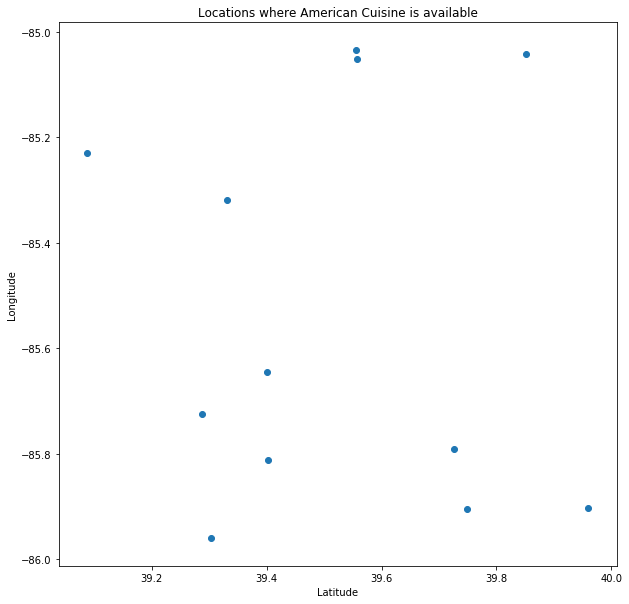

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = AmericanCuisine_plot["Latitude"]
y = AmericanCuisine_plot["Longitude"]
fig = plt.figure(figsize=(10, 10))
plt.scatter(x,y)
plt.title("Locations where American Cuisine is available")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [20]:
'''
Finding the Top 10 restaurants for students based on lesser average cost and high rating
'''
TopTenRestaurants = foodiex_data.sort_values(by=['Rating','Average_Cost'], ascending = (False,True))
TopTenRestaurants = TopTenRestaurants.drop(['Latitude','Longitude','Minimum_Order','Reviews','Cook_Time','Cuisines','Votes'], axis = 1)
TopTenRestaurants = TopTenRestaurants.drop_duplicates()
TopTenRestaurants.head(10)

,Restaurant,Average_Cost,Rating
169,ID_7412,15.00000,4.80000
1325,ID_4728,25.00000,4.80000
1803,ID_2201,20.00000,4.70000
144,ID_6537,25.00000,4.70000
325,ID_383,25.00000,4.70000
446,ID_1166,30.00000,4.70000
1428,ID_2051,30.00000,4.70000
35,ID_1160,60.00000,4.70000
1180,ID_1064,80.00000,4.70000
1501,ID_7924,80.00000,4.70000


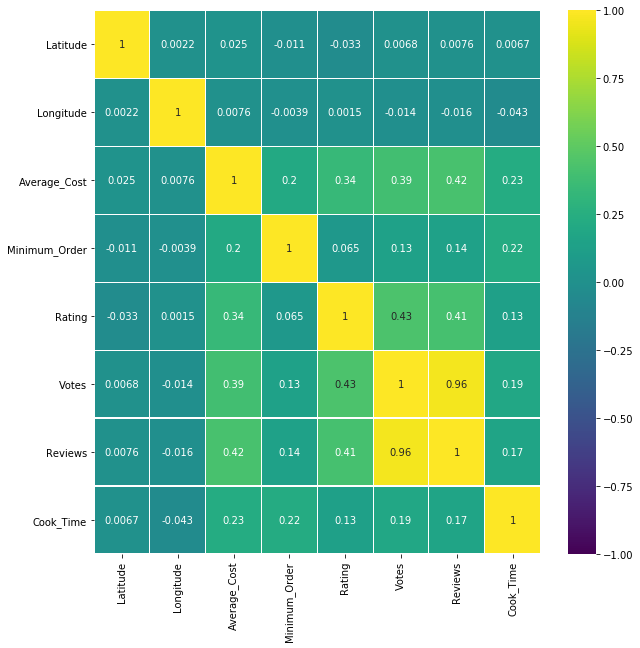

In [21]:
'''
To predict the rating based on average cost - since they are non-linear, I have used Decision tree regressor
'''
df_kor = foodiex_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

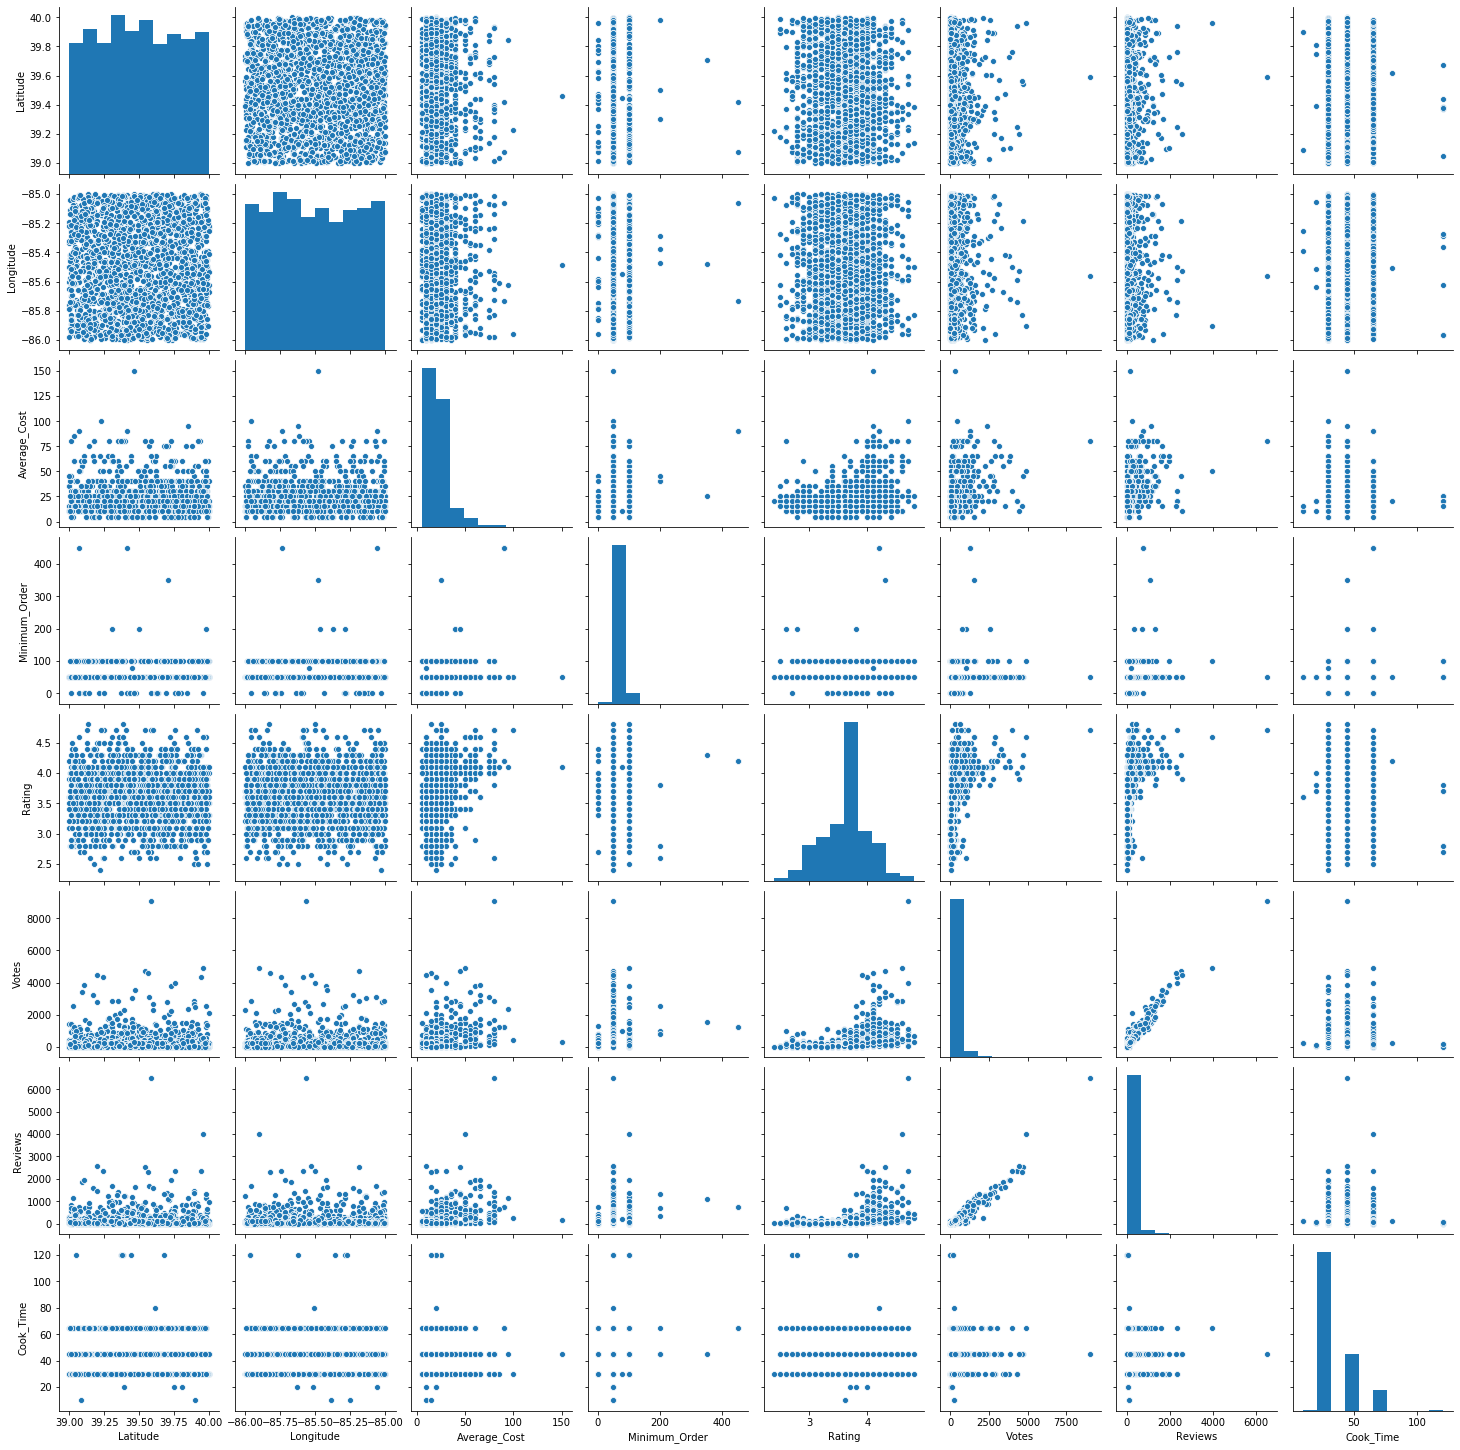

In [22]:
sns.pairplot(foodiex_data)

In [23]:
foodiex_data.isnull().sum()

Restaurant       0
Latitude         0
Longitude        0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Cook_Time        0
dtype: int64

In [27]:
new_df=foodiex_data.drop(['Restaurant', 'Latitude','Longitude','Cuisines','Minimum_Order','Votes','Reviews','Cook_Time'], axis = 1)
print(new_df)

      Average_Cost  Rating
0         20.00000 3.50000
1         10.00000 3.50000
2         15.00000 3.60000
3         25.00000 3.70000
4         20.00000 3.20000
...            ...     ...
2014      40.00000 3.60930
2015      40.00000 4.10000
2016      10.00000 3.60930
2017      10.00000 3.60930
2018     150.00000 4.10000

[2019 rows x 2 columns]


In [29]:
target_column = ['Rating']
predictors = list(set(list(new_df.columns))-set(target_column))
new_df[predictors] = new_df[predictors]/new_df[predictors].max()

In [30]:
new_df.describe()

,Average_Cost,Rating
count,2019.00000,2019.00000
mean,0.13356,3.60930
std,0.08447,0.38373
min,0.03333,2.40000
25%,0.06667,3.40000
50%,0.13333,3.60930
75%,0.13333,3.80000
max,1.00000,4.80000


In [32]:
X = new_df[predictors].values
y = new_df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1413, 1)
(606, 1)


In [33]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

# Code lines 4 to 6
pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

0.35925190136829904
0.12426139101814171
0.3638826280366173
0.0939372179105491


In [35]:
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [36]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

0.35550212246691804
0.1424474508854756
0.3635696530071561
0.0954951547440327


In [37]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2))

0.35316409187954195
0.15369008981790444
0.36252875590687555
0.10066692149788181


In [38]:
#RF model
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.3532364390848509
0.15334331374603027
0.36243323221662366
0.10114079450800195


#### This shows that upon training the model to predict the rating based on averagecost, there is 36% accuracy. With more data for training, this can be improved.